In [1]:
import numpy as np
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pickle

# 8-7. Batch Normalizations

Just like we normalize the input of the network, it turns out that normalizing values before the activation each layer is beneficial for training neural networks. Usually, a batch norm layer is inserted before an activation layer.

The benefits of batch norm are:

1. Faster training via higher learning rate
1. Robustness for initial weight
1. Slight regularization effect

Paper: Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift [arXiv:1502.03167](https://arxiv.org/abs/1502.03167)

With the learnable parameter $\gamma$ and $\beta$ (initially 1 and 0), the forward pass of batch norm is defined as followings:

\begin{align}
\mu      &\leftarrow \frac{1}{m} \sum_{i=1}^{m} x_i \\
\sigma^2 &\leftarrow \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu)^2 \\
\hat{x_i}&\leftarrow \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} \\
y_i      &\leftarrow \gamma \hat{x_i} + \beta
\end{align}

The backward pass can be derived using computational graph. [Understanding the backward pass through Batch Normalization Layer](https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html) by Frederik Kratzert has a detailed explanation.

![](https://kratzert.github.io/images/bn_backpass/BNcircuit.png)

## Five layer net w/ or wo/ batch normalization

* Five layers
* Around 40 neurons
* ReLU
* Random initialization ($10$–$10^{-4}$)
* With or without batch normalization

In [23]:
plt.rcParams['figure.figsize'] = [16, 16]

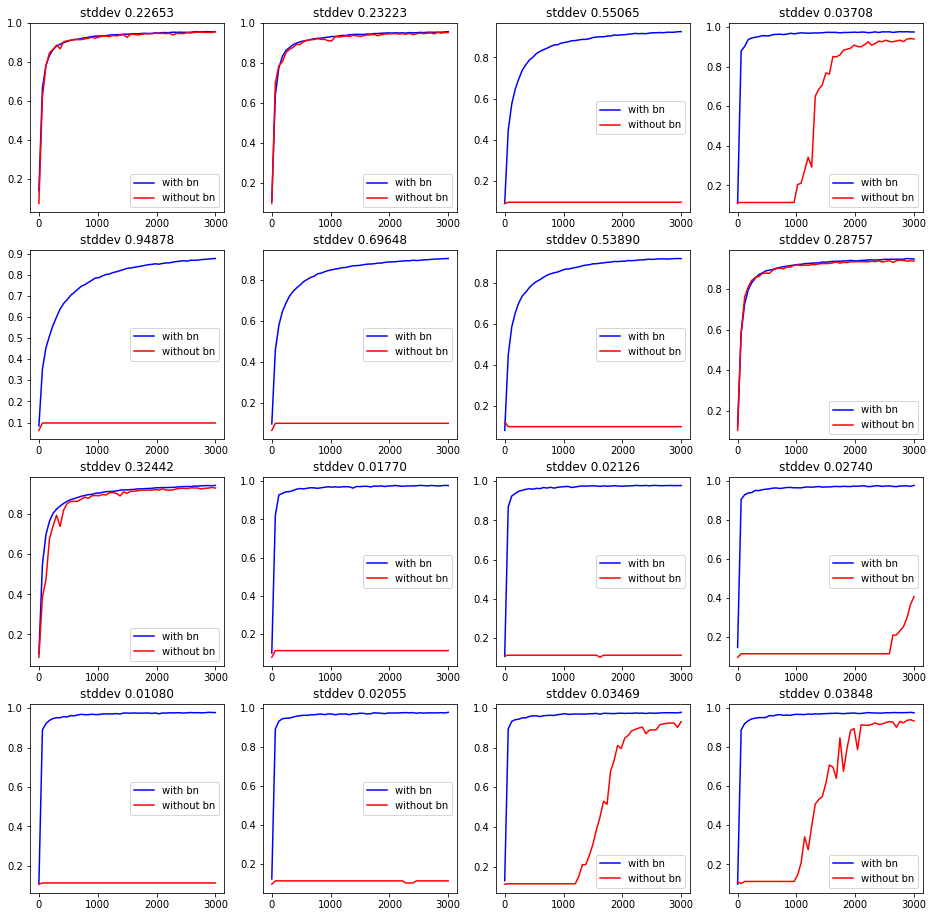

In [32]:
fig, axes = plt.subplots(4, 4)

for row in range(4):
    for col in range(4):
        index = row * 4 + col
        
        with_log = pickle.load(open('code/08_techniques/08_7_batch_norm/experiment_{}_True.pkl'.format(index), "rb"))
        without_log = pickle.load(open('code/08_techniques/08_7_batch_norm/experiment_{}_False.pkl'.format(index), "rb"))

        current = axes[row, col]
        current.plot(with_log['accuracy_test_itr'], with_log['accuracy_test'], 'b', label='with bn')
        current.plot(without_log['accuracy_test_itr'], without_log['accuracy_test'], 'r', label='without bn')
        current.legend()
        current.set_title('stddev %.5f' % with_log['weight_stddev'])

plt.show()